In [1]:
import re
import sys
import random

# Setup the "PYTHONPATH"
sys.path.insert(0, '../')

In [2]:
%matplotlib inline

from src.datasets import lj_speech_dataset
data = lj_speech_dataset(directory='../data', verbalize=False)
random.shuffle(data)

100%|██████████| 13100/13100 [00:00<00:00, 20269.79it/s]


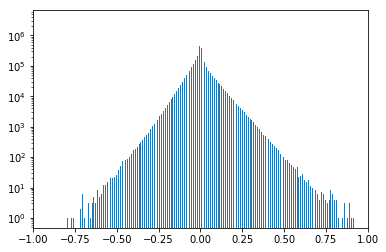

In [18]:
import librosa
from matplotlib import pyplot
from tqdm import tqdm_notebook
import numpy as np

bins=8192
range_ = (-1.0, 1.0)
histogram, bin_edges = None, None
for row in tqdm_notebook(data[:1000]):
    signal = librosa.core.load(row['wav'])[0]
    if histogram is None:
        histogram, bin_edges = np.histogram(signal, bins=bins, range=range_)
    else:
        next_histogram, next_bin_edges = np.histogram(signal, bins=bins, range=range_)
        assert np.array_equal(bin_edges, next_bin_edges)
        histogram += next_histogram
        
pyplot.bar(bin_edges[:-1], histogram, width=1.0/bins)
pyplot.xlim(*range_)
pyplot.yscale('log')
pyplot.show()   

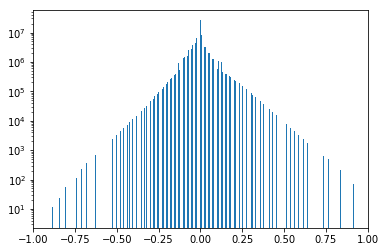

In [19]:
import librosa
from matplotlib import pyplot
from tqdm import tqdm_notebook
import numpy as np
from src.audio import mu_law_encode
from src.audio import mu_law_decode

bins=256
range_ = (-1.0, 1.0)
histogram, bin_edges = None, None
for row in tqdm_notebook(data[:1000]):
    signal = mu_law_decode(mu_law_encode(librosa.core.load(row['wav'])[0]))
    if histogram is None:
        histogram, bin_edges = np.histogram(signal, bins=bins, range=range_)
    else:
        next_histogram, next_bin_edges = np.histogram(signal, bins=bins, range=range_)
        assert np.array_equal(bin_edges, next_bin_edges)
        histogram += next_histogram
                
pyplot.bar(bin_edges[:-1], histogram, width=1.0/bins)
pyplot.xlim(*range_)
pyplot.yscale('log')
pyplot.show()   

In [40]:
mu_law_encode(mu_law_decode(253.5))

254

/Users/michaelp/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


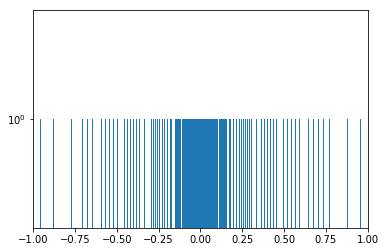

In [21]:

pyplot.bar(mu_law_decode(np.array(list(range(256)))), [1] * 256, width=1.0/bins)
pyplot.xlim(*range_)
pyplot.yscale('log')
pyplot.show()   